In [6]:
# !pip install pystac[validation]

In [7]:
# ! pip install pystac
# ! pip install rasterio
# ! pip install shapely

In [8]:
import os
import rasterio
import urllib.request
import pystac

from shapely.geometry import Polygon, mapping
from datetime import datetime, timezone
from tempfile import TemporaryDirectory

from pystac.extensions.eo import Band, EOExtension
from pystac.extensions.view import ViewExtension
from pystac.extensions.projection import ProjectionExtension

ModuleNotFoundError: No module named 'rasterio'

In [ ]:
# Set the temporary directory to store source data
# tmp_dir = TemporaryDirectory()
img_path = os.path.join('data','gobindpur_lulc_2024.tif')

# # Fetch and store data
# url = ('https://spacenet-dataset.s3.amazonaws.com/'
#        'spacenet/SN5_roads/train/AOI_7_Moscow/MS/'
#        'SN5_roads_train_AOI_7_Moscow_MS_chip996.tif')
# urllib.request.urlretrieve(url, img_path)

In [ ]:
img_path

'data/gobindpur_lulc_2024.tif'

In [ ]:
# !cp data/gobindpur_lulc_2024.tif tmp_dir

In [ ]:
def get_bbox_and_footprint(raster):
    with rasterio.open(raster) as r:
        crs = r.crs
        res = r.res
        transform = r.transform
        linear_units = crs.linear_units

        bounds = r.bounds
        bbox = [bounds.left, bounds.bottom, bounds.right, bounds.top]
        footprint = Polygon([
            [bounds.left, bounds.bottom],
            [bounds.left, bounds.top],
            [bounds.right, bounds.top],
            [bounds.right, bounds.bottom]
        ])       
        tags = r.tags()
        date_str = tags.get("TIFFTAG_DATETIME")
        print(date_str)
        return (bbox, mapping(footprint),crs,res,transform,linear_units)

In [ ]:
bbox, footprint,crs,res,transform,linear_units = get_bbox_and_footprint(img_path)

None


In [ ]:
res

(0.008983152841195215, 0.008983152841195215)

In [ ]:
transform

Affine(0.008983152841195215, 0.0, 85.48907232851838,
       0.0, -0.008983152841195215, 23.205639745489126)

In [ ]:
linear_units

'unknown'

In [ ]:
bbox

[85.48907232851838, 22.42410544830514, 86.30653923706714, 23.205639745489126]

In [ ]:
footprint

{'type': 'Polygon',
 'coordinates': (((85.48907232851838, 22.42410544830514),
   (85.48907232851838, 23.205639745489126),
   (86.30653923706714, 23.205639745489126),
   (86.30653923706714, 22.42410544830514),
   (85.48907232851838, 22.42410544830514)),)}

In [ ]:
crs

CRS.from_wkt('GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]')

In [ ]:
import datetime

In [ ]:
item = pystac.Item(id='raster-poc',
                      geometry=footprint,
                      bbox=bbox,
                      datetime=datetime.datetime.now(),
                      properties={})

In [ ]:
item

<Item id=raster-poc>

In [ ]:
item.datetime

datetime.datetime(2025, 6, 12, 15, 10, 10, 36026)

In [ ]:
item.geometry

{'type': 'Polygon',
 'coordinates': (((85.48907232851838, 22.42410544830514),
   (85.48907232851838, 23.205639745489126),
   (86.30653923706714, 23.205639745489126),
   (86.30653923706714, 22.42410544830514),
   (85.48907232851838, 22.42410544830514)),)}

In [ ]:
item.bbox

[85.48907232851838, 22.42410544830514, 86.30653923706714, 23.205639745489126]

In [ ]:
# item.validate()

In [ ]:
with rasterio.open(img_path) as r:
    img = r.read()

In [ ]:
# !pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
r.count

1

In [ ]:
img2 = img.reshape(img.shape[1],img.shape[2])

In [ ]:
img2.shape

(87, 91)

In [ ]:
vis_params = {
    'min': 0,
    'max': 12,
    'palette': ['#000000',  # 0 Black- background
            '#ff0000',   # 1 Red- builtup
            '#74ccf4', # 2 Light Blue- kharif water
            '#1ca3ec', # 3 Blue- kharif and rabi water
            '#0f5e9c', # 4 Dark Blue- kharif and rabi and zaid water
            '#f1c232', # 5 Yellow- croplands
            '#38761d', # 6 Dark Green- Tree/Forests
            '#A9A9A9', # 7 Gray- barren lands
            '#f1c232', # 8 Yellow- Single Kharif Cropping
            '#f59d22', # 9 Mustard- Single Non-Kharif Cropping
            '#e68600', # 10 Orange- Double Cropping
            '#b3561d', # 11 Brown- Triple Cropping
            '#c39797' # 12 Mauve- Shrubs_Scrubs
            ]
    }

In [ ]:
import matplotlib

In [ ]:
vis_params['palette']

['#000000',
 '#ff0000',
 '#74ccf4',
 '#1ca3ec',
 '#0f5e9c',
 '#f1c232',
 '#38761d',
 '#A9A9A9',
 '#f1c232',
 '#f59d22',
 '#e68600',
 '#b3561d',
 '#c39797']

In [ ]:
cmap = matplotlib.colors.ListedColormap(vis_params['palette'])
norm = matplotlib.colors.BoundaryNorm(range(len(vis_params['palette'])), cmap.N)


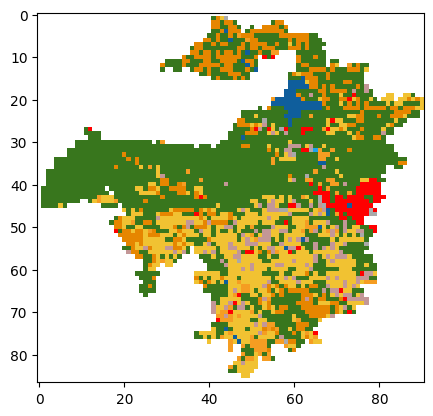

In [ ]:
plt.imshow(img2,interpolation='none', cmap=cmap, norm=norm) #https://stackoverflow.com/questions/32766062/how-to-determine-the-colours-when-using-matplotlib-pyplot-imshow

In [ ]:
import PIL

In [ ]:
size = (128,128)

In [ ]:
image = Image.fromarray(img2)
image.thumbnail(size)
image.save(thumbnail_path)

In [ ]:
from osgeo import gdal
print("GDAL version:", gdal.VersionInfo())


GDAL version: 3040100


In [12]:
from osgeo import gdal

input_path = "/home/vishnu/corestack_STAC/data/gobindpur_lulc_2023_2024.tif"
output_path = "/home/vishnu/corestack_STAC/data/gobindpur_lulc_2023_2024_cog.tif"

def convert_geotiff_to_cog(input_path, output_path):
    gdal.Translate(
        output_path,
        input_path,
        format='COG',
        creationOptions=[
            'COMPRESS=DEFLATE',
            'BLOCKSIZE=512',
            'TILED=YES',
            'BIGTIFF=YES',
            'COPY_SRC_OVERVIEWS=YES',
        ]
    )
    print(f"COG saved to: {output_path}")


convert_geotiff_to_cog(input_path, output_path)


Warning 6: driver COG does not support creation option TILED
Warning 6: driver COG does not support creation option COPY_SRC_OVERVIEWS


COG saved to: /home/vishnu/corestack_STAC/data/gobindpur_lulc_2023_2024_cog.tif


In [20]:
!pip install earthengine-api geemap


4696.47s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Defaulting to user installation because normal site-packages is not writeable
  Using cached earthengine_api-1.5.20-py3-none-any.whl (462 kB)
  Using cached geemap-0.35.3-py2.py3-none-any.whl (2.3 MB)
  Using cached google_cloud_storage-3.1.1-py3-none-any.whl (175 kB)
  Using cached google_api_python_client-2.172.0-py3-none-any.whl (13.6 MB)
  Using cached google_auth-2.40.3-py2.py3-none-any.whl (216 kB)
  Using cached google_auth_httplib2-0.2.0-py2.py3-none-any.whl (9.3 kB)
  Using cached python_box-7.3.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (4.0 MB)
  Using cached folium-0.20.0-py2.py3-none-any.whl (113 kB)
  Using cached ipyfilechooser-0.6.0-py3-none-any.whl (11 kB)
  Using cached bqplot-0.12.45-py2.py3-none-any.whl (1.2 MB)
  Using cached ipyevents-2.0.2-py3-none-any.whl (101 kB)
  Using cached colour-0.1.5-py2.py3-none-any.whl (23 kB)
  Using cached scooby-0.10.1-py3-none-any.whl (18 kB)
  Using cached eerepr-0.1.2-py3-none-any.whl (9.5 kB)
  Using cached geo

In [1]:
import ee
import geemap

try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()


asset_id = "projects/ee-corestackdev/assets/apps/mws/jharkhand/saraikela-kharsawan/gobindpur/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m"

lulc_image = ee.Image(asset_id)

aoi = lulc_image.geometry().bounds()

print(lulc_image.getInfo())

geemap.ee_export_image(
    image=lulc_image.clip(aoi),
    filename='saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif',
    scale=10,
    region=aoi
)

print("GeoTIFF downloaded as 'saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif'")


Please restart Jupyter kernel after installation if you encounter any errors when importing geemap.


ValueError: numpy.dtype size changed, may indicate binary incompatibility. Expected 96 from C header, got 88 from PyObject

In [1]:
from datetime import datetime
import os

filepath = "/home/vishnu/corestack_STAC/data/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif"

filename = os.path.basename(filepath)


parts = filename.split('_')
start_date = datetime.strptime(parts[2], "%Y-%m-%d")
end_date = datetime.strptime(parts[3], "%Y-%m-%d")
print("Start Date:", start_date.strftime("%Y-%m-%d"))
print("End Date:", end_date.strftime("%Y-%m-%d"))


Start Date: 2023-07-01
End Date: 2024-06-30


In [3]:
# Step 1: Imports
import rasterio
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os

# Step 2: Define Paths (same as your STAC script)
input_tif = "/home/vishnu/corestack_STAC/data/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif"
output_cog = "/home/vishnu/corestack_STAC/data/gobindpur_lulc_cog.tif"
data_dir = os.path.dirname(input_tif)

# Step 3: Convert GeoTIFF to COG
def convert_geotiff_to_cog(input_path, output_path):
    gdal.Translate(
        output_path,
        input_path,
        format='COG',
        creationOptions=[
            'COMPRESS=DEFLATE',
            'BLOCKSIZE=512',
            'BIGTIFF=YES'
        ]
    )
    print(f"✅ COG saved to: {output_path}")

convert_geotiff_to_cog(input_tif, output_cog)

with rasterio.open(output_cog) as src:
    band = src.read(1)
    unique_vals = np.unique(band)
    print("Unique pixel values in COG:", unique_vals)

with rasterio.open(output_cog) as src:
    array = src.read(1)

plt.figure(figsize=(6, 6))
plt.title("COG Preview - Gobindpur LULC")
plt.axis('off')
plt.imshow(array, cmap='tab20')  # You can try 'viridis', 'Set3', or custom cmap
plt.colorbar(label="LULC Class")
plt.show()


ModuleNotFoundError: No module named 'rasterio'

In [4]:
!pip install rasterio matplotlib numpy


Defaulting to user installation because normal site-packages is not writeable
  Using cached rasterio-1.4.3-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (22.2 MB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached affine-2.4.0-py3-none-any.whl (15 kB)
  Using cached numpy-2.2.6-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.8 MB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 2.2.6 which is incompatible.


In [5]:
!pip install gdal


Defaulting to user installation because normal site-packages is not writeable


✅ COG saved to: /home/vishnu/corestack_STAC/data/gobindpur_lulc_cog.tif
Unique pixel values in COG: [ 1.  4.  6.  7.  8.  9. 10. 12. nan]


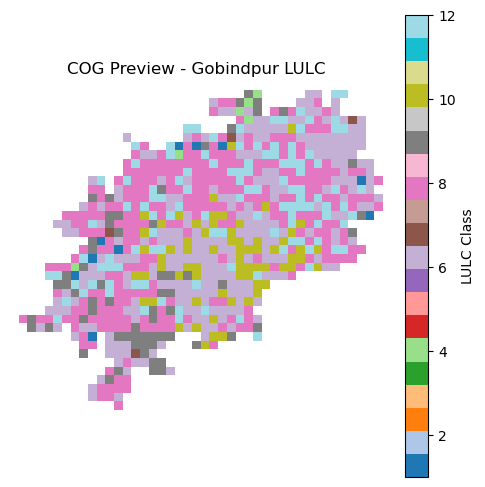

In [ ]:

import rasterio
from osgeo import gdal
import numpy as np
import matplotlib.pyplot as plt
import os


input_tif = "/home/vishnu/corestack_STAC/data/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif"
output_cog = "/home/vishnu/corestack_STAC/data/gobindpur_lulc_cog.tif"
data_dir = os.path.dirname(input_tif)


def convert_geotiff_to_cog(input_path, output_path):
    gdal.Translate(
        output_path,
        input_path,
        format='COG',
        creationOptions=[
            'COMPRESS=DEFLATE',
            'BLOCKSIZE=512',
            'BIGTIFF=YES'
        ]
    )
    print(f"✅ COG saved to: {output_path}")

convert_geotiff_to_cog(input_tif, output_cog)

with rasterio.open(output_cog) as src:
    band = src.read(1)
    unique_vals = np.unique(band)
    print("Unique pixel values in COG:", unique_vals)

with rasterio.open(output_cog) as src:
    array = src.read(1)

plt.figure(figsize=(6, 6))
plt.title("COG Preview - Gobindpur LULC")
plt.axis('off')
plt.imshow(array, cmap='tab20')  # You can try 'viridis', 'Set3', or custom cmap
plt.colorbar(label="LULC Class")
plt.show()


In [6]:
import ee
import geemap

# Initialize GEE
try:
    ee.Initialize()
except Exception as e:
    ee.Authenticate()
    ee.Initialize()

# Load your Earth Engine asset
asset_id = "projects/ee-corestackdev/assets/apps/mws/jharkhand/saraikela-kharsawan/gobindpur/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m"
lulc_image = ee.Image(asset_id)

# Define Area of Interest (AOI)
aoi = lulc_image.geometry().bounds()

# Optional: Print some metadata
info = lulc_image.getInfo()
print("LULC Metadata:")
print(" - Bands:", [band['id'] for band in info['bands']])
print(" - Type:", info['type'])

# Export image to GeoTIFF
geemap.ee_export_image(
    image=lulc_image.clip(aoi),
    filename='saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif',
    scale=10,
    region=aoi,
    crs='EPSG:4326'
)

print("\n✅ GeoTIFF successfully downloaded as 'saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif'")


Please restart Jupyter kernel after installation if you encounter any errors when importing geemap.


ImportError: C extension: pandas.compat._constants not built. If you want to import pandas from the source directory, you may need to run 'python setup.py build_ext' to build the C extensions first.

In [5]:
!pip uninstall -y numpy pandas geemap
!pip install numpy pandas --force-reinstall --no-cache-dir
!pip install geemap --force-reinstall --no-cache-dir


Found existing installation: numpy 2.2.6
Uninstalling numpy-2.2.6:
  Successfully uninstalled numpy-2.2.6
Found existing installation: pandas 2.0.0
Uninstalling pandas-2.0.0:
  Successfully uninstalled pandas-2.0.0
Found existing installation: geemap 0.35.3
Uninstalling geemap-0.35.3:
  Successfully uninstalled geemap-0.35.3
Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.8/16.8 MB 6.9 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 7.1 MB/s eta 0:00:000:00:01m eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 347.8/347.8 KB 7.8 MB/s eta 0:00:009.6 MB/s eta 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 229.9/229.9 KB 59.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 509.2/509.2 KB 8.4 MB/s eta 0:00:00 MB/s eta 0:00:01
  Attempting uninstall: tzdata
    Found existing installation: tzdata 2023.3
    Uninstalling tzdata-2023.3:
     

In [ ]:
import rasterio
import matplotlib.pyplot as plt
import os

# === Update this to point to your correct TIFF file ===
input_tif = "/home/vishnu/corestack_STAC/data/saraikela-kharsawan_gobindpur_2023-07-01_2024-06-30_LULCmap_10m.tif"
thumbnail_path = "/home/vishnu/corestack_STAC/data/thumbnail_gobindpur.png"

# === Load and preview the raster ===
with rasterio.open(input_tif) as src:
    array = src.read(1)

# === Plot and save thumbnail ===
plt.figure(figsize=(3, 3))
plt.axis('off')
plt.imshow(array, cmap='tab20')  # Optional: use a custom colormap
plt.savefig(thumbnail_path, bbox_inches='tight', pad_inches=0)
plt.close()

print(f"✅ Thumbnail saved at: {thumbnail_path}")
